In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from google.colab import files
uploaded = files.upload()

Saving archive (7).zip to archive (7).zip


In [6]:
import zipfile

with zipfile.ZipFile("archive (7).zip", 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
# Scale the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X_train, y_train)

print("Train accuracy (linear):", svc_linear.score(X_train, y_train))
print("Test accuracy (linear):", svc_linear.score(X_test, y_test))

Train accuracy (linear): 0.9868131868131869
Test accuracy (linear): 0.956140350877193


In [9]:
svc_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svc_rbf.fit(X_train, y_train)

print("Train accuracy (RBF):", svc_rbf.score(X_train, y_train))
print("Test accuracy (RBF):", svc_rbf.score(X_test, y_test))

Train accuracy (RBF): 0.9868131868131869
Test accuracy (RBF): 0.9736842105263158


In [10]:
scores = cross_val_score(svc_rbf, X_scaled, y, cv=5)
print("Cross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation accuracy scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV accuracy: 0.9736376339077782


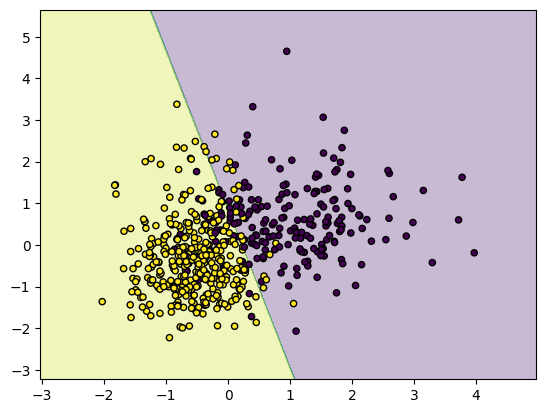

In [11]:
X_2D = X_scaled[:, :2]  # Only first two features
svc_vis = SVC(kernel='linear', C=1)
svc_vis.fit(X_2D, y)

# Plot
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.show()

plot_decision_boundary(X_2D, y, svc_vis)

In [12]:
svc_rbf_tuned = SVC(kernel='rbf', C=10, gamma=0.01)
svc_rbf_tuned.fit(X_train, y_train)
print("Test accuracy with tuned hyperparameters:", svc_rbf_tuned.score(X_test, y_test))

Test accuracy with tuned hyperparameters: 0.9824561403508771


In [13]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svc_rbf_tuned, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean CV accuracy: 0.9789318428815401
